In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true);
# pygui(true);
H=.1
Yfind(h)=sqrt(2h/(2h+1));

In [2]:
Ham_numerator(Q,P)=((Q[1]+Q[2])^2+(P[1]+P[2])^2)*((Q[1]-Q[2])^2+(P[1]-P[2])^2)
Ham_denominator(Q,P)=(Q[1]^2+(P[2]-1)^2)*(Q[1]^2+(P[2]+1)^2)*(Q[2]^2+(P[1]-1)^2)*(Q[2]^2+(P[1]+1)^2)
Aref_Hamiltonian(Q,P,t)=1/2*sqrt(Ham_numerator(Q,P)/Ham_denominator(Q,P));


In [3]:
Y=Yfind(H);t_end=1000.0;
Q0,P0=[zeros(2) for i in 1:2];
Q0[1]=0.; 
Q0[2]=0.; 
P0[1]=Y; 
P0[2]=1e-3 *sqrt(2);

In [4]:
Aref_Hamiltonian(Q0,P0,t_end)

0.09999899999799998

In [5]:
prob= HamiltonianProblem{true}(Aref_Hamiltonian, Q0, P0, (0., t_end));
@time t,A=solve(prob, Vern9(),reltol=1e-13,abstol=1e-15,maxiters=1e15);

 25.042711 seconds (91.71 M allocations: 3.611 GiB, 11.98% gc time)


In [6]:
Q1=A[1,:]
Q2=A[2,:]
P1=A[3,:]
P2=A[4,:];

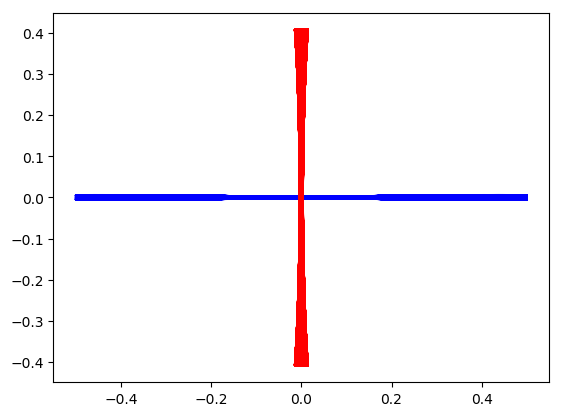

In [7]:
plot(Q1,P2,"b")
plot(Q2,P1,"r");

In [8]:
q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2);

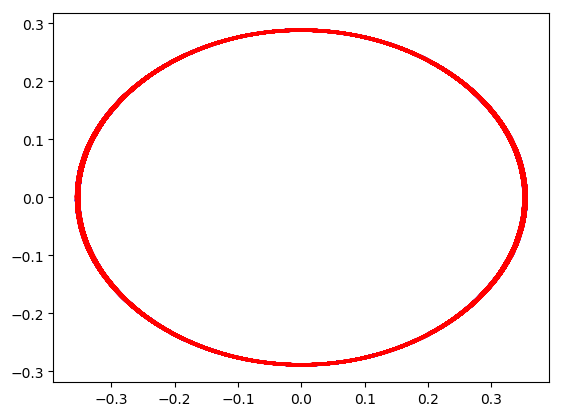

In [9]:
plot(q1,p1,"b")
plot(q2,p2,"r");